   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6
(50, 5)
        State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


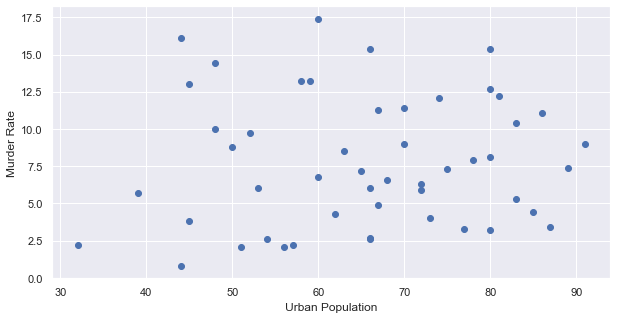

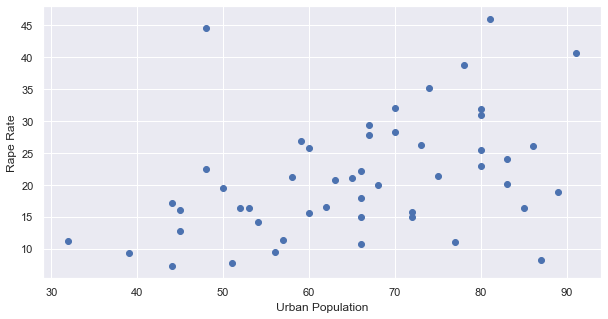

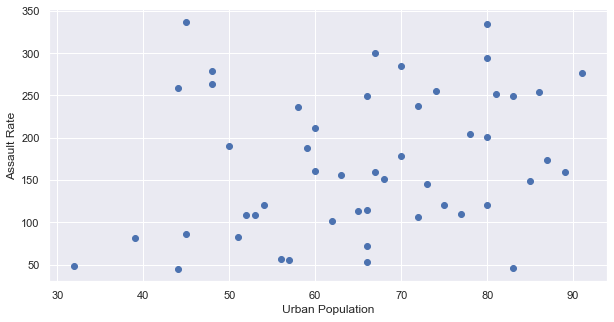

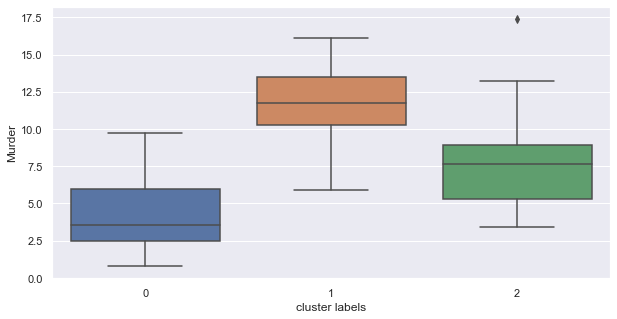

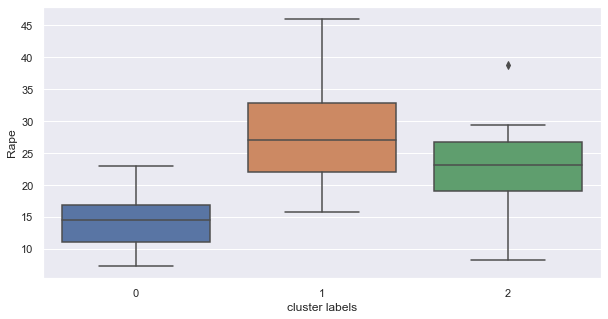

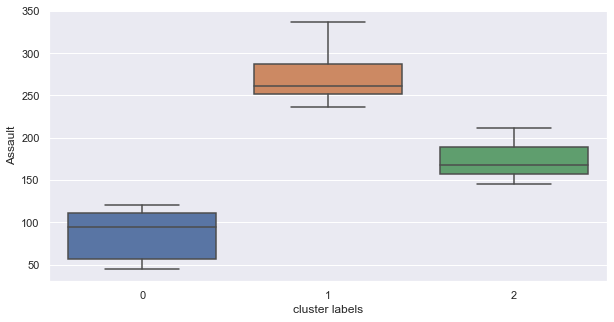

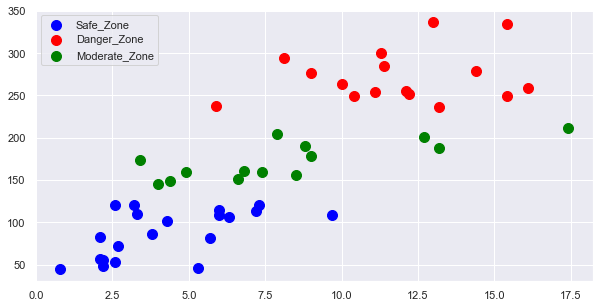

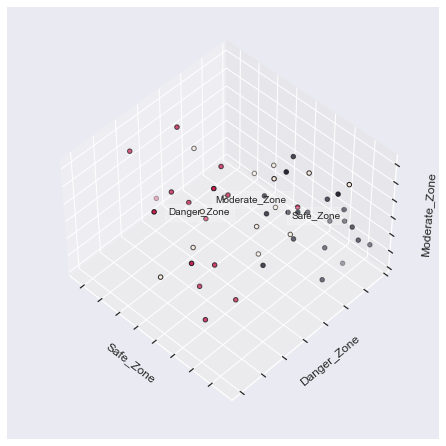

In [12]:
#Import the Desired Libraries:
import warnings
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

#Reading and Understanding the Data
crime = pd.read_csv(r"C:\Users\admin\Downloads\USArrests.csv")
print(crime.head(5))
print(crime.shape)
crime.isnull().sum()
crime = crime.rename(columns={'Unnamed: 0':'State'})
print(crime.head())

plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Murder',data=crime)
plt.xlabel('Urban Population')
plt.ylabel('Murder Rate')

plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Rape',data=crime)
plt.xlabel('Urban Population')
plt.ylabel('Rape Rate')

plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Assault',data=crime)
plt.xlabel('Urban Population')
plt.ylabel('Assault Rate')

data = crime.iloc[:,1:].values

scaled_data = scaler.fit_transform(data)

AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

y_pred =AC.fit_predict(data)
y_pred

crime['cluster labels']= y_pred

crime[['State','cluster labels']]

plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Murder', data=crime)

plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Rape', data=crime)

plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Assault', data=crime)

Safe_Zone= crime.groupby('cluster labels')['State'].unique()[0]
Safe_Zone

Danger_Zone= crime.groupby('cluster labels')['State'].unique()[1]
Danger_Zone

Moderate_Zone= crime.groupby('cluster labels')['State'].unique()[2]
Moderate_Zone

plt.figure(figsize=(10,5))
plt.scatter(data[y_pred==0, 0], data[y_pred==0, 1], s=100, c='blue', label ='Safe_Zone')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='red', label ='Danger_Zone')
plt.scatter(data[y_pred==2, 0], data[y_pred==2, 1], s=100, c='green', label ='Moderate_Zone')
plt.legend()
plt.show()


fignum = 1
fig = plt.figure(fignum, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

X=crime.iloc[:,:-1].values
y=crime.iloc[:,-1].values

for name, label in [('Safe_Zone', 0),
                    ('Danger_Zone', 1),
                    ('Moderate_Zone', 2)]:
    ax.text3D(data[y_pred == label, 3].mean(),
              data[y_pred == label, 0].mean(),
              data[y_pred == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y_pred, [1, 0, 2]).astype(np.float)
ax.scatter(data[:, 3], data[:, 0], data[:, 2], c=y_pred, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Safe_Zone')
ax.set_ylabel('Danger_Zone')
ax.set_zlabel('Moderate_Zone')
ax.dist = 12
fig.show()